In [1]:
#import functions
import mne
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os
from mne_bids import BIDSPath, read_raw_bids, print_dir_tree, make_report
from mne_bids.path import get_bids_path_from_fname
from ecog_preproc_utils import transformData
from GetData import getSubjects, getData, getEpochs, mean_epoched_corr

In [2]:
data_dir = "/home/jovyan/ieegmovie_data/"


In [3]:
#get subjects
subjects=getSubjects(data_dir)

print(subjects)

['sub-07', 'sub-09', 'sub-14', 'sub-16', 'sub-18', 'sub-22', 'sub-24', 'sub-27', 'sub-41', 'sub-45', 'sub-46', 'sub-51', 'sub-55', 'sub-60']


In [4]:
## Setup variables for task data
sess = 'iemu'
task_r = 'film'
acq = 'clinical'
run = "1"

In [ ]:
for subj in subjects:
    try:
        subj_data=getData(subj, data_dir, sess, task_r, acq, run)
        bids_path=subj_data.getBidsPath()
        #get data
        hg_data=subj_data.getHGData()
        car_data=subj_data.getCARData()
        alpha_data=subj_data.getAlphaData()
        theta_data=subj_data.getThetaData()
        ##get event data
        hg_music, hg_speech= getEpochs(hg_data).getEpochsEvents()
        car_music, car_speech= getEpochs(car_data).getEpochsEvents()
        alpha_music, alpha_speech= getEpochs(alpha_data).getEpochsEvents()
        theta_music, theta_speech= getEpochs(theta_data).getEpochsEvents()
        #get corr for events 
        #hg
        hg_music_corr = mean_epoched_corr(hg_music)
        hg_speech_corr= mean_epoched_corr(hg_speech)
        #car
        car_music_corr = mean_epoched_corr(car_music)
        car_speech_corr= mean_epoched_corr(car_speech)
        #alpha
        alpha_music_corr = mean_epoched_corr(alpha_music)
        alpha_speech_corr= mean_epoched_corr(alpha_speech)
        #theta
        theta_music_corr = mean_epoched_corr(theta_music)
        theta_speech_corr= mean_epoched_corr(theta_speech)
        #save music data
        save_path=data_dir+"corrMaps/music-speech/"
        hg_msave= os.path.join(save_path+"HighGamma/", f'{bids_path.basename}_HighGamma_music_corr.npy')
        car_msave= os.path.join(save_path+"CAR/", f'{bids_path.basename}_CAR_music_corr.npy')
        alpha_msave= os.path.join(save_path+"Alpha/", f'{bids_path.basename}_alpha_music_corr.npy')
        theta_msave= os.path.join(save_path+"Theta/", f'{bids_path.basename}_theta_music_corr.npy')
        np.save(hg_msave, hg_music_corr)
        np.save(car_msave, car_music_corr)
        np.save(alpha_msave, car_music_corr)
        np.save(theta_msave, car_music_corr)
        #save speech data
        hg_ssave= os.path.join(save_path+"HighGamma/", f'{bids_path.basename}_HighGamma_speech_corr.npy')
        car_ssave= os.path.join(save_path+"CAR/", f'{bids_path.basename}_CAR_speech_corr.npy')
        alpha_ssave= os.path.join(save_path+"Alpha/", f'{bids_path.basename}_alpha_speech_corr.npy')
        theta_ssave= os.path.join(save_path+"Theta/", f'{bids_path.basename}_theta_speech_corr.npy')
        np.save(hg_ssave, hg_speech_corr)
        np.save(car_ssave, car_speech_corr)
        np.save(alpha_ssave, car_speech_corr)
        np.save(theta_ssave, car_speech_corr)
    except:
        pass


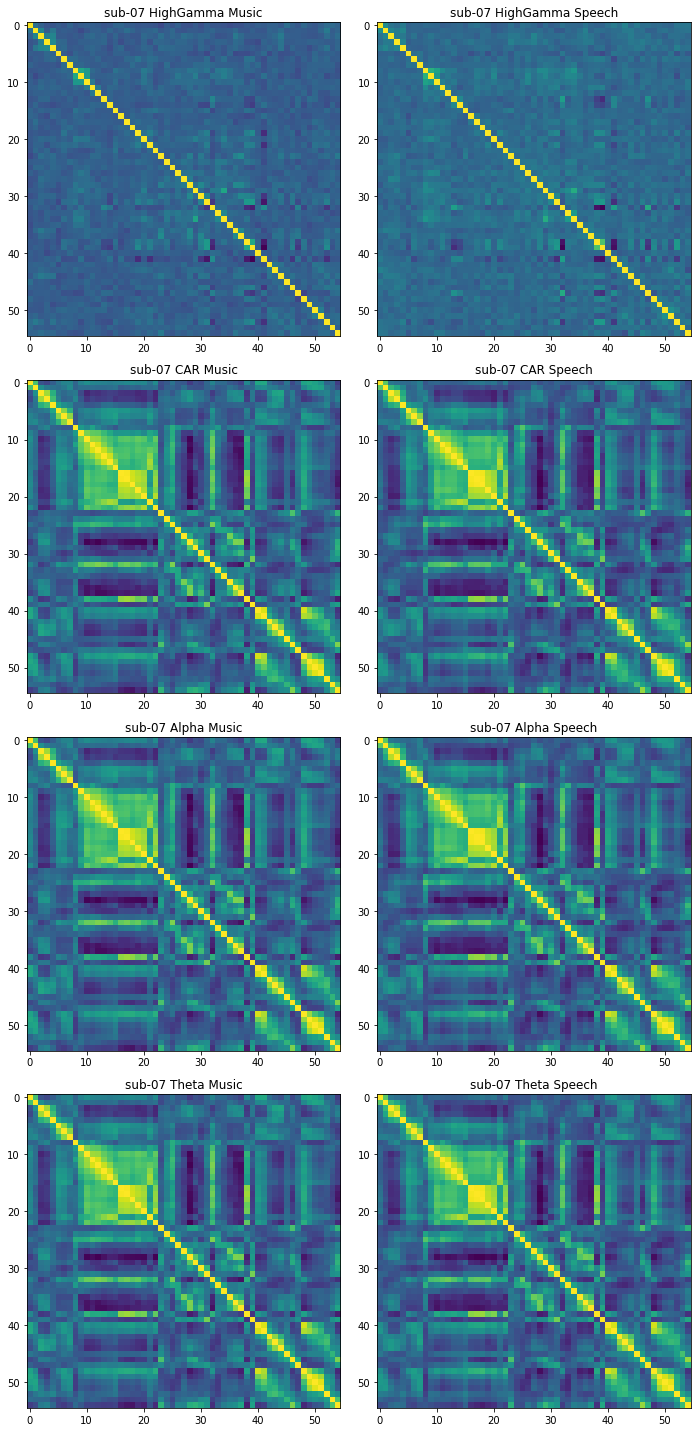

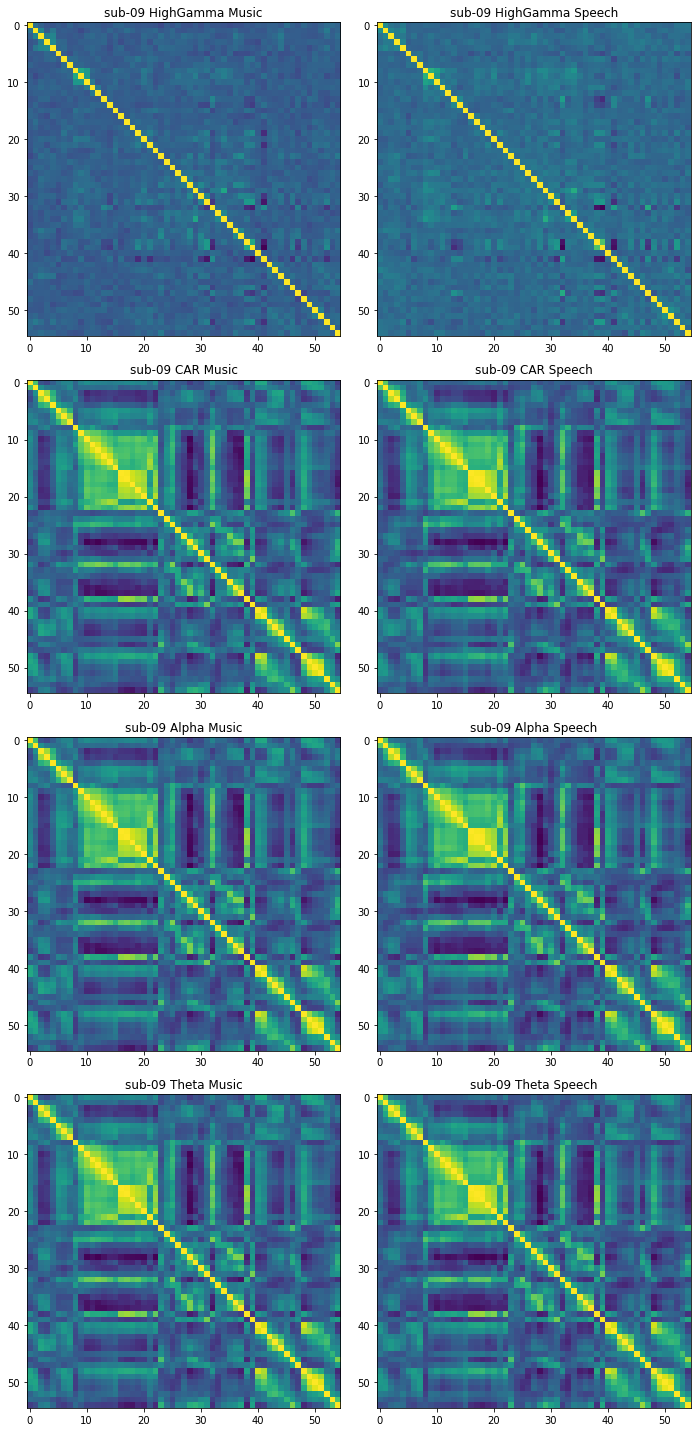

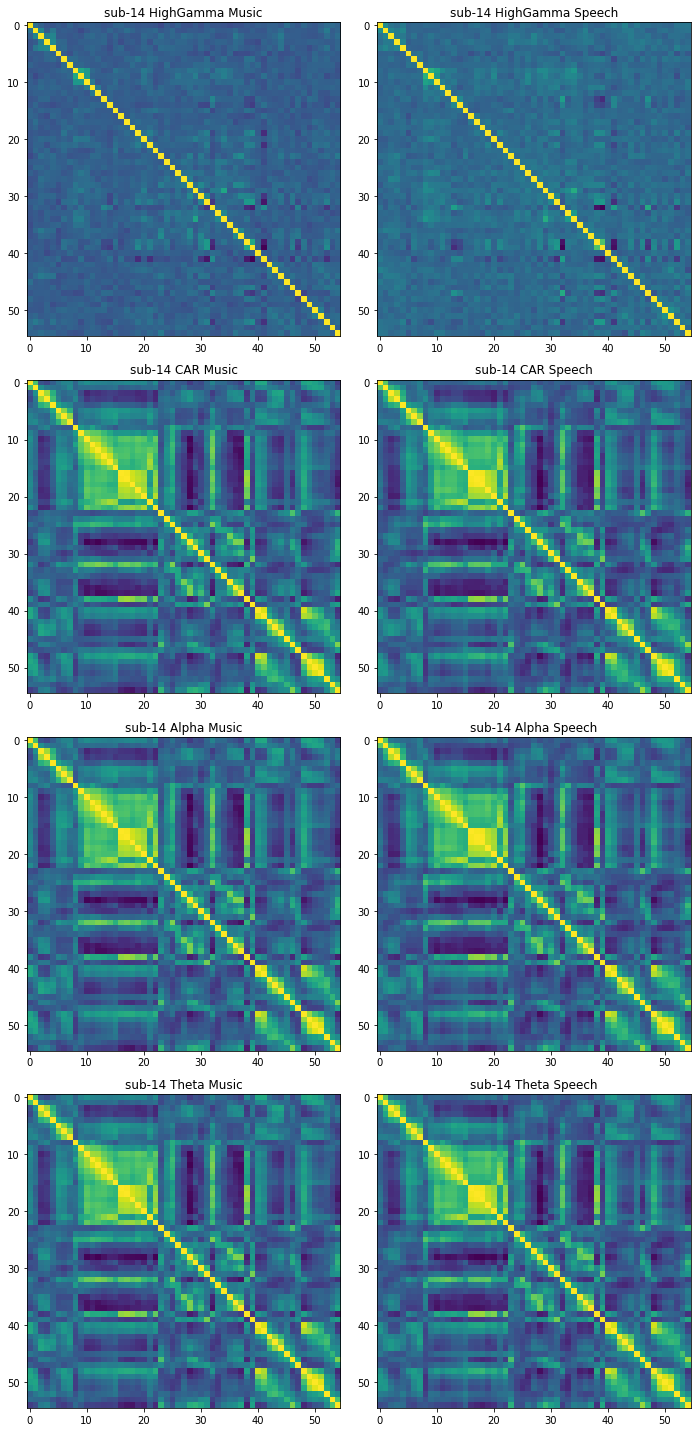

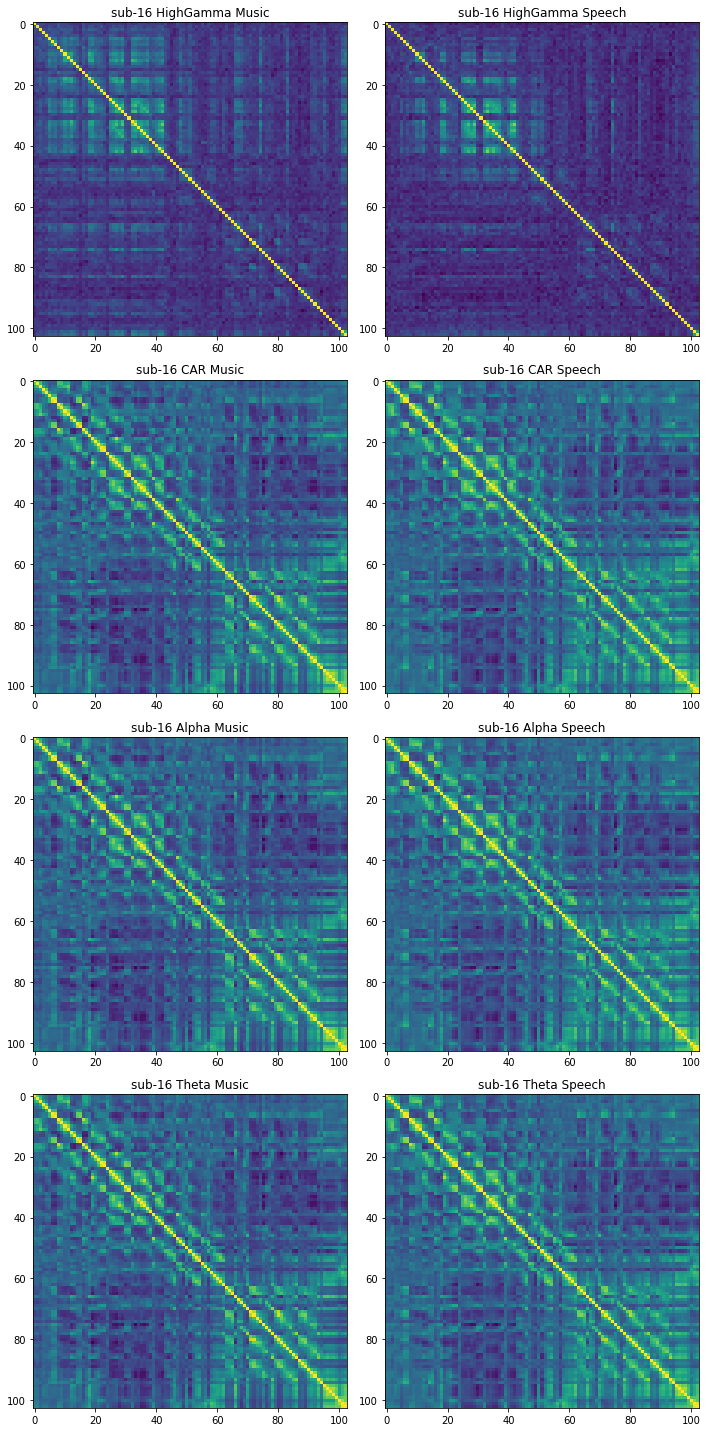

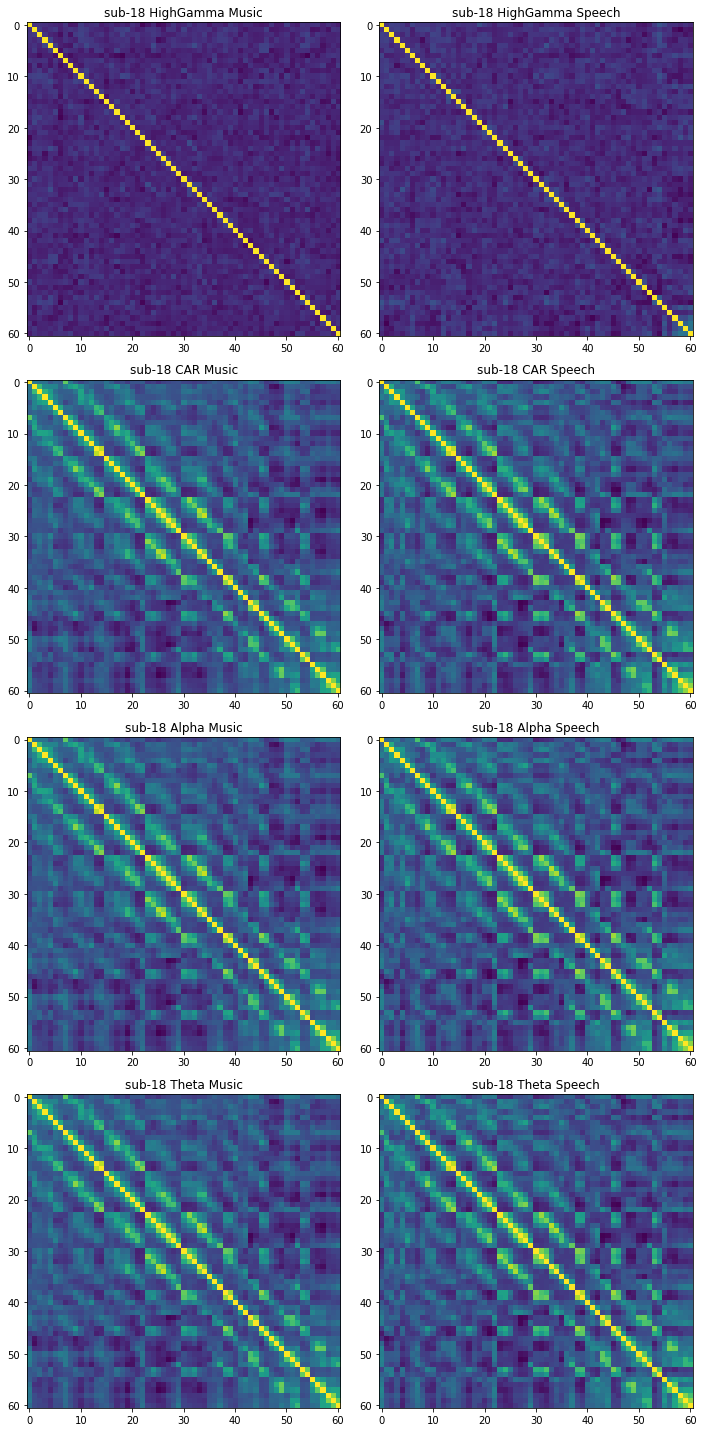

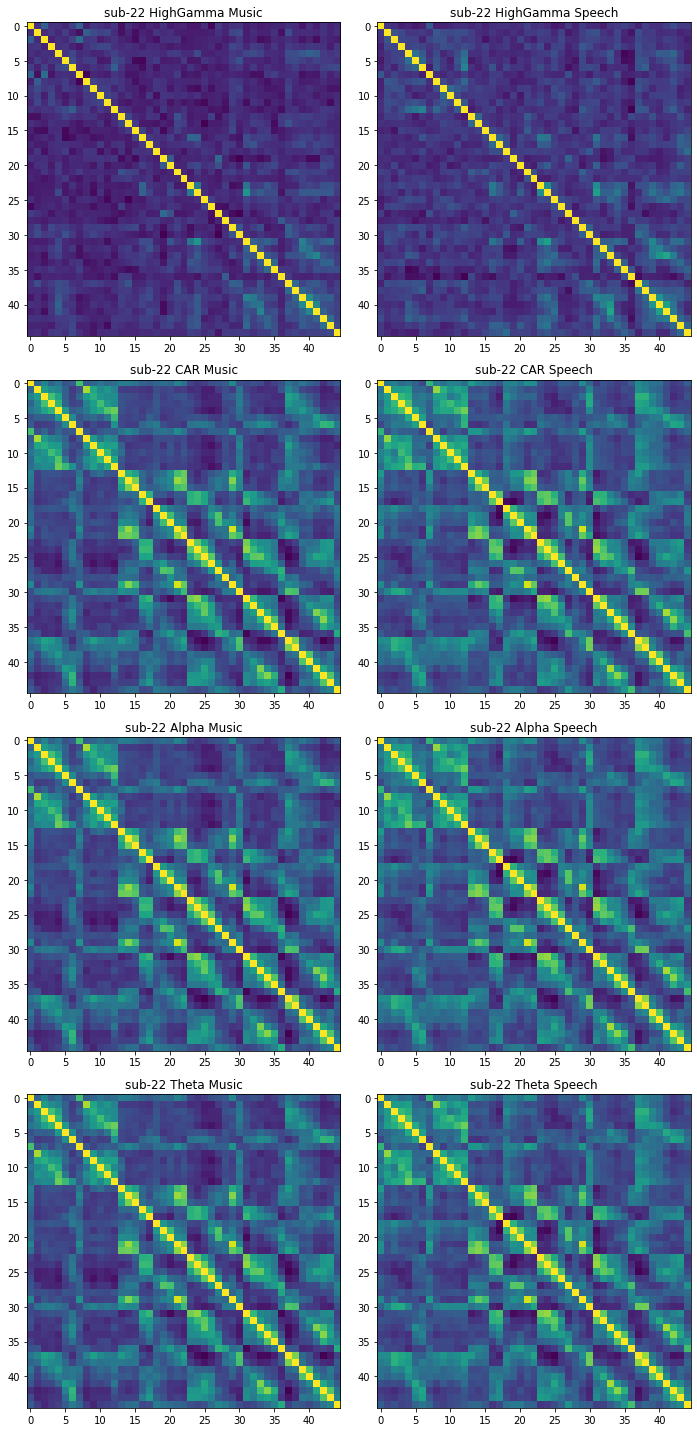

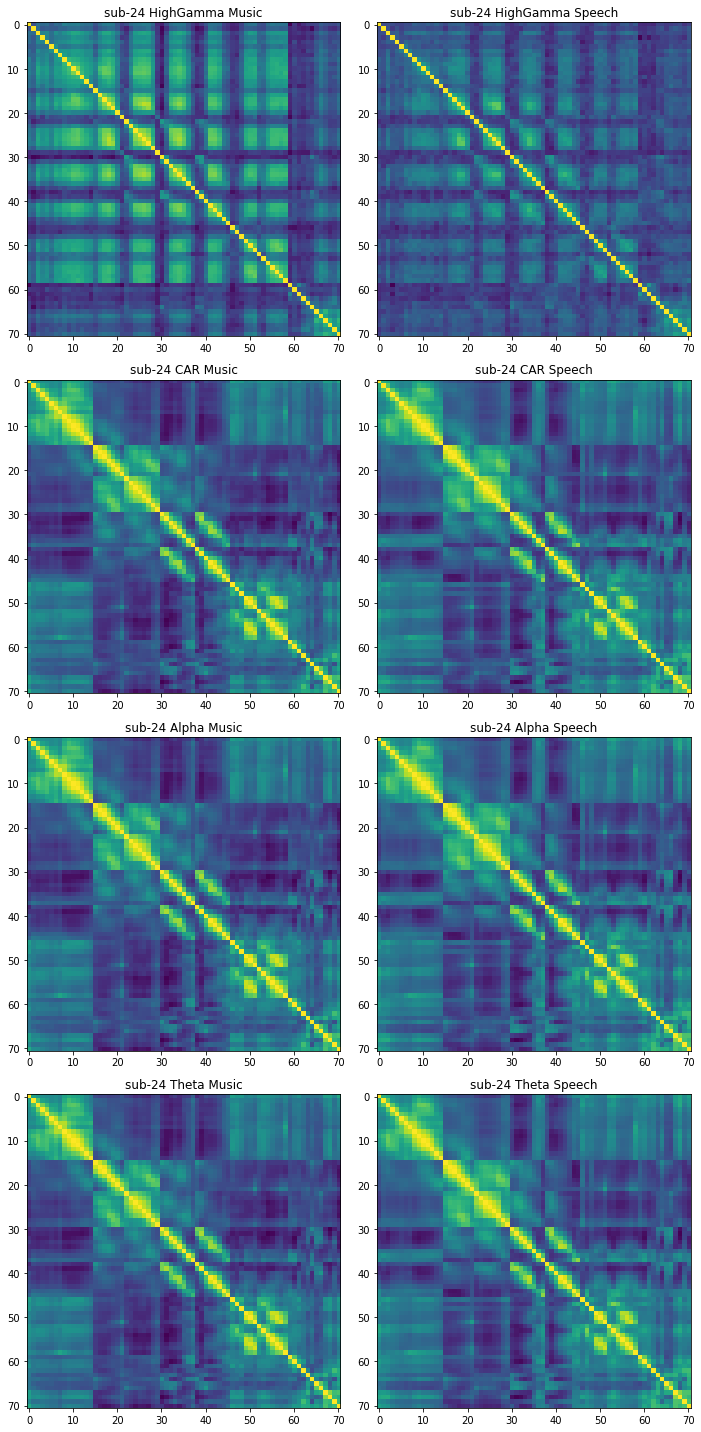

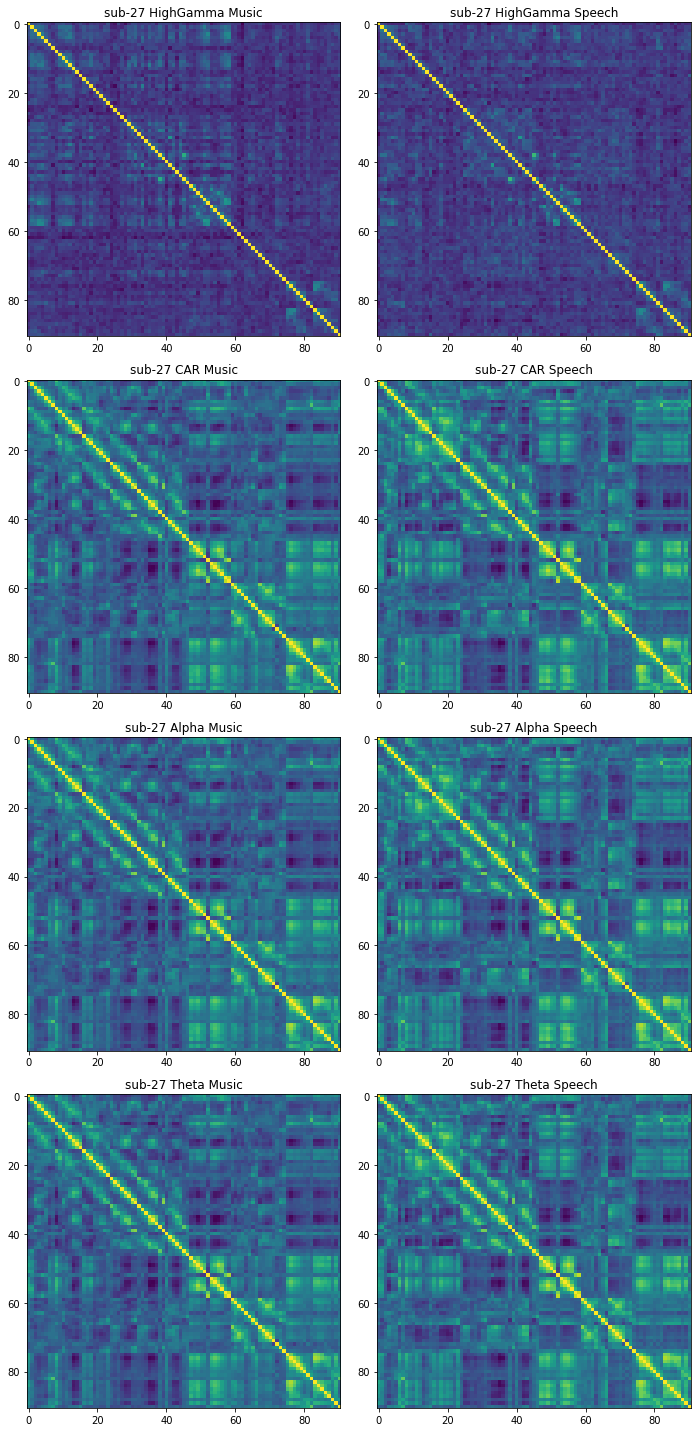

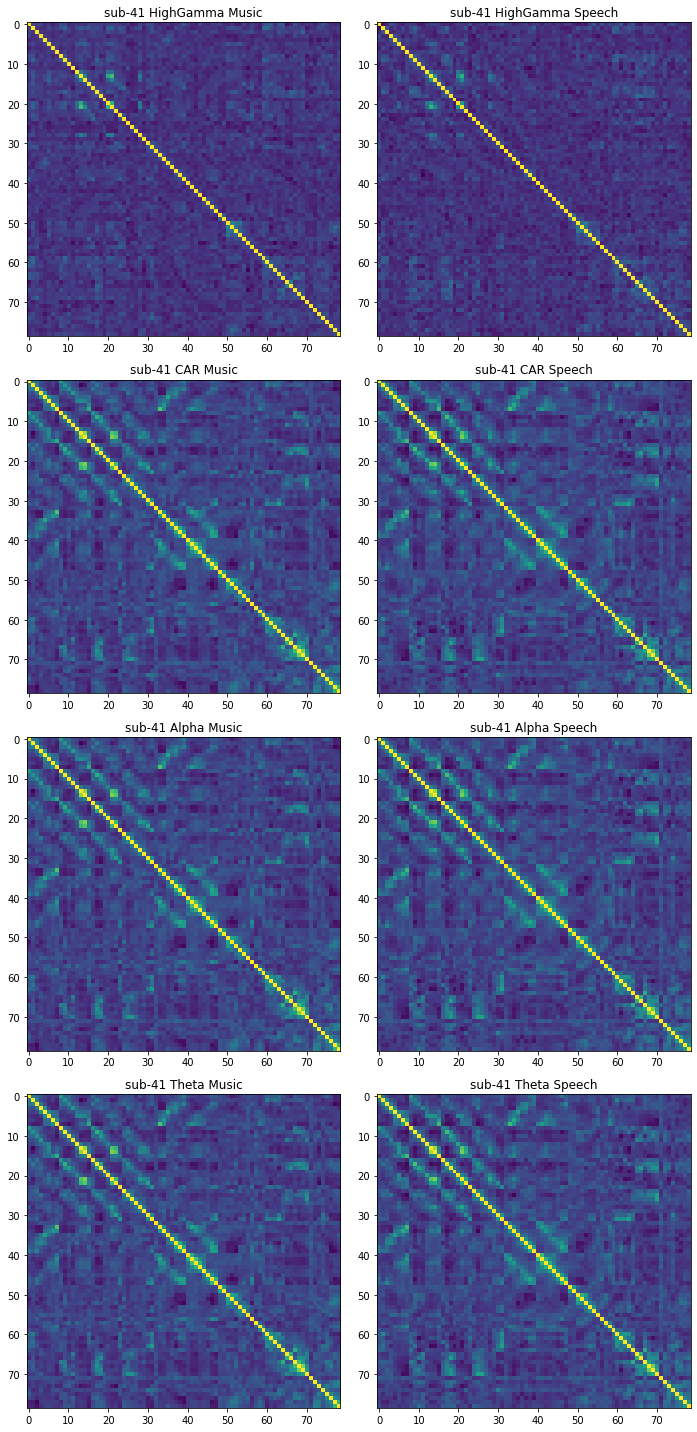

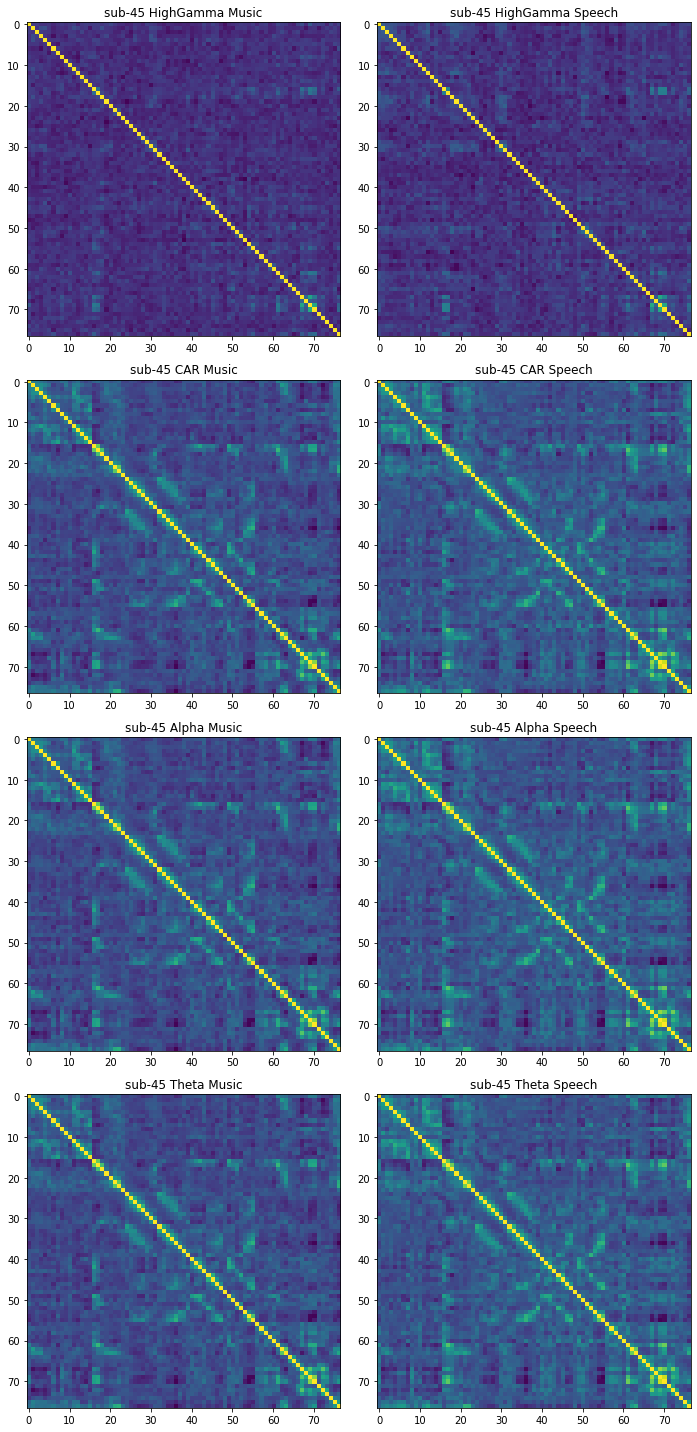

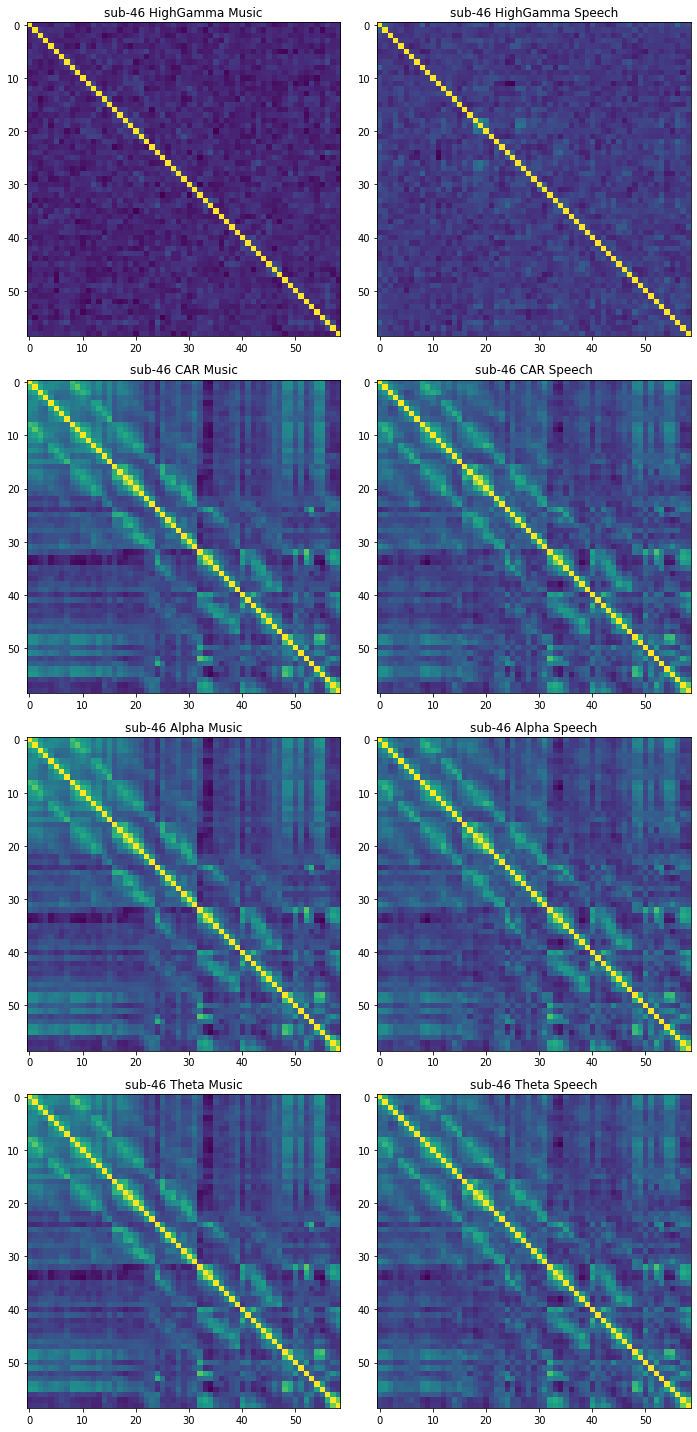

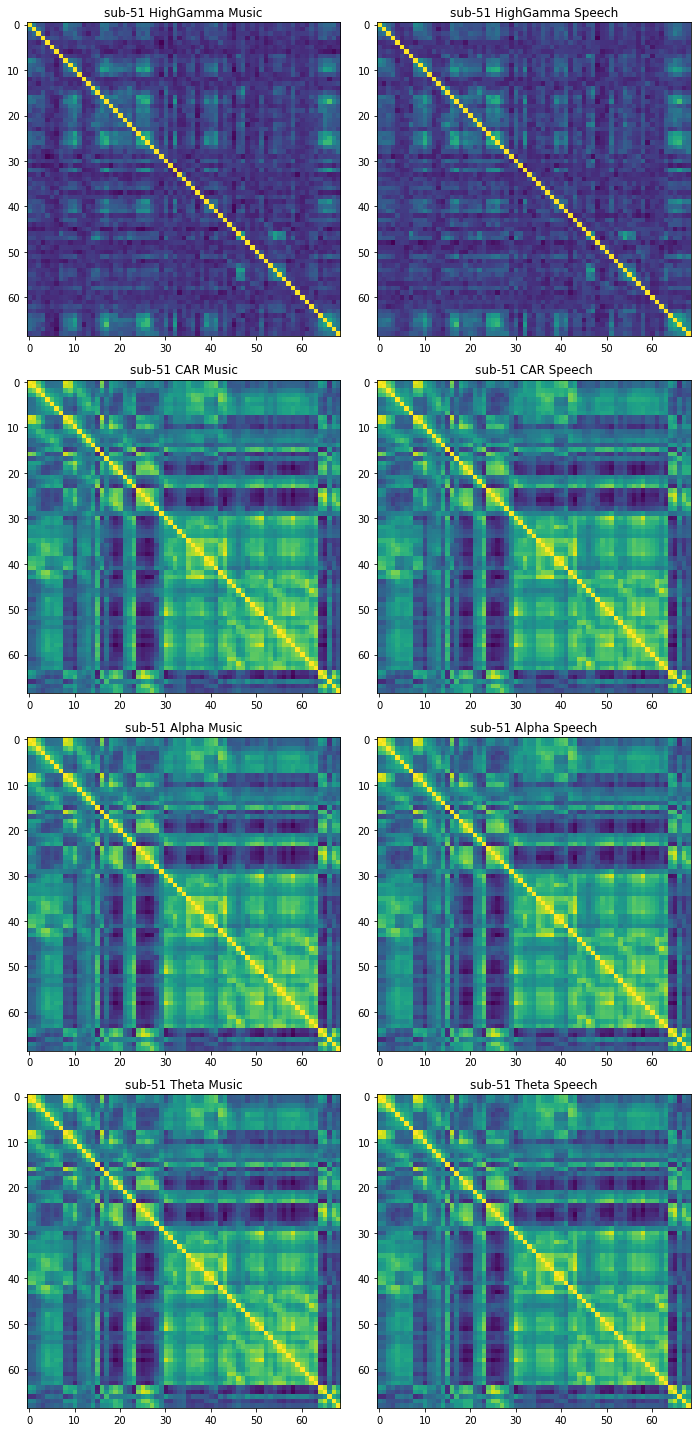

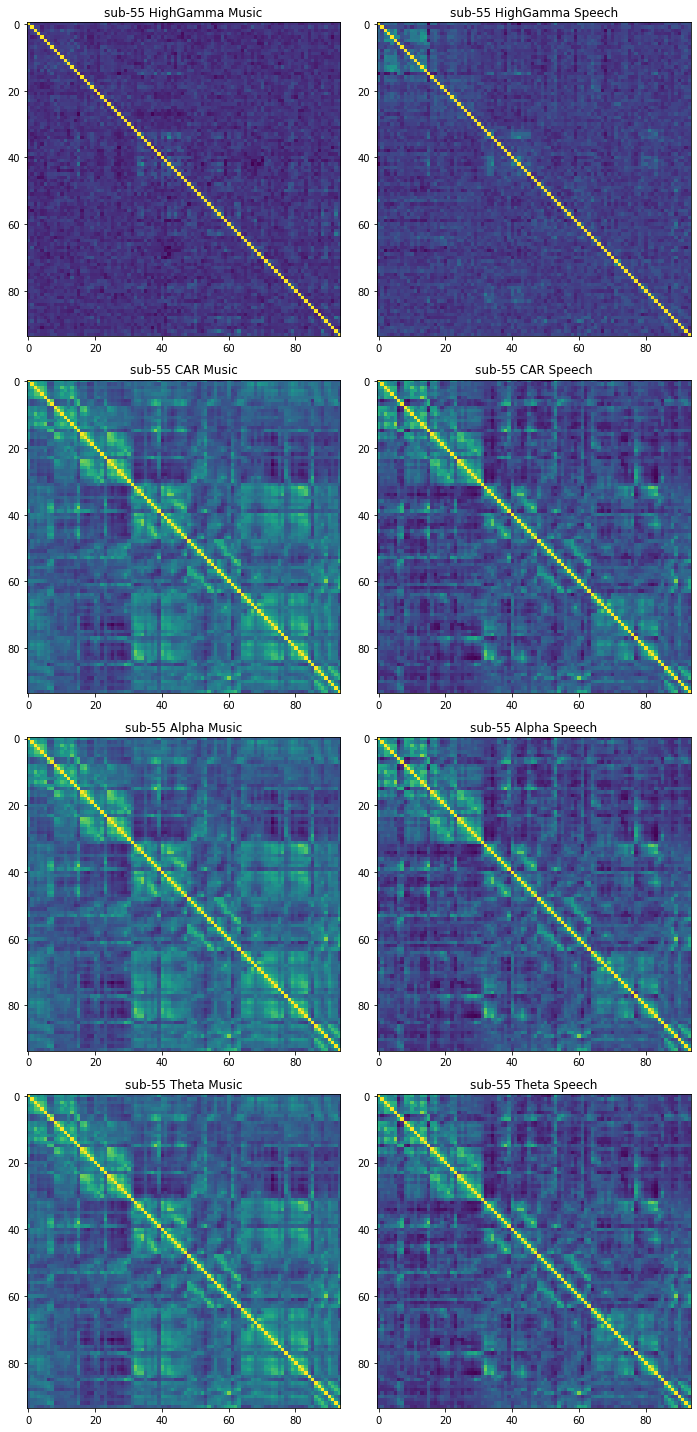

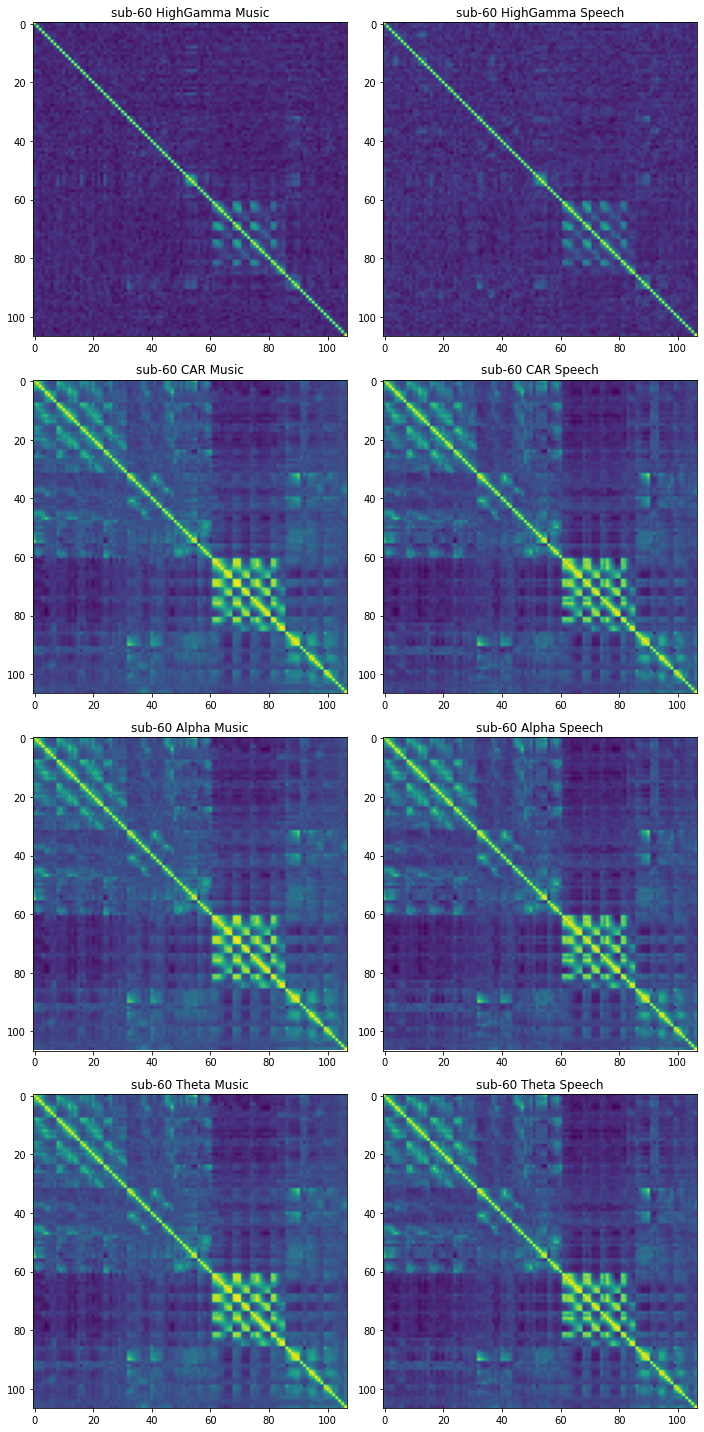

In [23]:
#plot and save 
hg_dir=data_dir+"corrMaps/music-speech/HighGamma/"
car_dir=data_dir+"corrMaps/music-speech/CAR/"
alpha_dir=data_dir+"corrMaps/music-speech/Alpha/"
theta_dir=data_dir+"corrMaps/music-speech/Theta/"
for subj in subjects:
    #HighGamma
    for hgfile in os.listdir(hg_dir):
        if hgfile.startswith(subj) and "music" in hgfile:
            hg_music=np.load(hg_dir+hgfile)
        if hgfile.startswith(subj) and "speech" in hgfile:
            hg_speech=np.load(hg_dir+hgfile)
    #CAR
    for carfile in os.listdir(car_dir):
        if carfile.startswith(subj) and "music" in carfile:
            car_music=np.load(car_dir+carfile)
        if carfile.startswith(subj) and "speech" in carfile:
            car_speech=np.load(car_dir+carfile)
    #Alpha
    for alphafile in os.listdir(alpha_dir):
        if alphafile.startswith(subj) and "music" in alphafile:
            alpha_music=np.load(alpha_dir+alphafile) 
        if alphafile.startswith(subj) and "speech" in alphafile:
            alpha_speech=np.load(alpha_dir+alphafile)           
    #Theta
    for thetafile in os.listdir(theta_dir):
        if thetafile.startswith(subj) and "music" in thetafile:
            theta_music=np.load(theta_dir+thetafile)
        if thetafile.startswith(subj) and "speech" in thetafile:
            theta_speech=np.load(theta_dir+thetafile)
            
    fig, axs = plt.subplots(4,2)
    #highGamma
    axs[0,0].imshow(hg_music)
    axs[0,0].set_title(subj + " HighGamma Music")
    axs[0,1].imshow(hg_speech)
    axs[0,1].set_title(subj + " HighGamma Speech")
    #CAR
    axs[1,0].imshow(car_music)
    axs[1,0].set_title(subj + " CAR Music")
    axs[1,1].imshow(car_speech)
    axs[1,1].set_title(subj + " CAR Speech")
    #Alpha
    axs[2,0].imshow(alpha_music)
    axs[2,0].set_title(subj + " Alpha Music")
    axs[2,1].imshow(alpha_speech)
    axs[2,1].set_title(subj + " Alpha Speech")
    #Theta
    axs[3,0].imshow(theta_music)
    axs[3,0].set_title(subj + " Theta Music")
    axs[3,1].imshow(theta_speech)
    axs[3,1].set_title(subj + " Theta Speech")
    plt.tight_layout()
    plt.rcParams["figure.figsize"] = (10,20)
    plt.savefig("/home/jovyan/ieegmovie/corrMatrices/music-speech/"+subj+"_music-speech-corrMat.png")
    
    